In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/train_data.csv'
file_key_2 = 'AmericanExpress/train_labels.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading data-files
train = pd.read_csv(file_content_stream_1, dtype = dtype_dict)
target = pd.read_csv(file_content_stream_2)

## Appending target variables
train = pd.merge(train, target, on = 'customer_ID', how = 'left')
train.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.0048

## Feature Engineering of Deliquency Variables

In [2]:
## Selecting Deliquency variables
my_variables = train.columns
D_variables = [x for x in my_variables if x.startswith('D_')]
to_select = ['customer_ID', 'target']
for i in range(2, (len(D_variables) + 2)):
    to_select.append(D_variables[i-2])

train_deli = train[to_select]
train_deli.head()

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.001734,0.008774,NaN,NaN,0.000630,0.708984,0.358643,0.525391,0.255615,NaN,0.148682,1.335938,0.207275,NaN,1.001953,0.354492,0.151978,0.158569,0.063660,0.199585,0.308350,0.091064,CR,O,0.007126,NaN,6.0,0.009010,0.008339,0.119385,0.004803,NaN,0.080444,0.069092,NaN,NaN,0.001575,0.004238,0.004059,0.003532,0.506836,0.007042,0.000830,0.007084,NaN,NaN,0.002665,1.503906,1.005859,0.003569,0.008873,0.004951,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,NaN,0.004326,NaN,NaN,1.007812,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.002052,0.005970,NaN,0.004345,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.005775,0.000798,NaN,NaN,0.002525,0.712891,0.353516,0.521484,0.223389,NaN,0.149780,1.339844,0.202759,NaN,1.008789,0.326660,0.156250,0.148438,0.065491,0.151367,0.265137,0.086792,CR,O,0.002413,NaN,6.0,0.007843,0.006523,0.140625,0.000094,NaN,0.081421,0.074158,NaN,NaN,0.009895,0.007599,0.000126,0.007774,0.500977,0.007790,0.009468,0.006676,NaN,NaN,0.002508,1.503906,1.005859,0.000571,0.000391,0.003180,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,NaN,0.008705,NaN,NaN,1.007812,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.001034,0.004837,NaN,0.007496,NaN,NaN,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.091492,0.007599,NaN,NaN,0.007607,0.720703,0.334717,0.524414,0.189453,NaN,0.151978,1.336914,0.206665,NaN,1.008789,0.304199,0.153809,0.139526,0.070618,0.305908,0.212158,0.093994,CR,O,0.001878,NaN,6.0,0.006023,0.002615,0.075867,0.007153,NaN,0.078918,0.076538,NaN,NaN,0.009628,0.003094,0.000954,0.008812,0.504395,0.004093,0.002325,0.001185,NaN,NaN,0.009636,1.502930,1.005859,0.007427,0.009232,0.005432,0.806641,1.002930,1.009766,0.928711,NaN,0.670898,NaN,0.004093,NaN,NaN,1.003906,0.003269,1.0,0.239868,0.0,4.0,0.240723,0.239746,0.0,0.705078,0.434326,0.003956,0.689941,0.009621,1.0,1.009766,1.007812,1.006836,0.005680,0.005497,NaN,0.009224,NaN,NaN,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002455,0.000685,NaN,NaN,0.006405,0.724121,0.323242,0.530762,0.135620,NaN,0.151245,1.339844,0.208252,NaN,1.007812,0.275146,0.155762,0.138062,0.065918,0.273438,0.204346,0.094849,CR,O,0.005898,NaN,6.0,0.005272,0.002052,0.150269,0.005363,NaN,0.077515,0.071533,NaN,NaN,0.008568,0.003895,0.005665,0.004650,0.508789,0.008820,0.005924,0.003325,NaN,NaN,0.007790,1.503906,1.006836,0.000664,0.003201,0.000063,0.808105,1.001953,1.004883,0.935547,NaN,0.672852,NaN,0.009705,NaN,NaN,1.002930,0.000053,1.0,0.240967,0.0,4.0,0.239380,0.240723,0.0,0.711426,0.437012,0.005135,0.687988,0.004650,1.0,1.001953,1.003906,1.007812,0.007107,0.008263,NaN,0.007206,NaN,NaN,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002483,0.004654,NaN,NaN,0.007732,0.720703,0.230957,0.529297,NaN,NaN,0.154053,1.341797,0.205444,NaN,1.003906,0.231079,0.154907,0.126465,0.063721,0.233154,0.175659,0.093933,CR,O,0.009476,NaN,6.0,0.000152,0.001419,0.096436,0.007973,NaN,0.076538,0.074463,NaN,NaN,0.003288,0.002607,0.004463,0.001141,0.506348,0.001844,0.00551

In [48]:
sum(np.isnan(train_deli['D_145'])) / train_deli.shape[0]

0.01835829333026723

In [ ]:
ID = train_deli['customer_ID'].unique()

train_deli[train_deli['customer_ID'] == ID[0]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[1]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[2]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[3]]

In [ ]:
train_deli[train_deli['customer_ID'] == ID[4]]

## Feaure Engineering of D_39

In [100]:
X = train_deli[['customer_ID', 'D_39', 'target']]

def f(x):
    
    d = {}
    d['D_39_mean'] = x['D_39'].mean()
    d['D_39_median'] = x['D_39'].median()
    d['D_39_min'] = x['D_39'].min()
    d['D_39_max'] = x['D_39'].max()
    d['D_39_range'] = x['D_39'].max() - x['D_39'].min()
    d['D_39_IQR'] = np.percentile(x['D_39'], 75) - np.percentile(x['D_39'], 25)
#     d['D_39_negative_count'] = np.sum(x['D_39'] < 0) 
    d['D_39_positive_count'] = np.sum(x['D_39'] > 0)
    d['D_39_values_above_mean'] = np.sum(x['D_39'] > x['D_39'].mean())
    
    return pd.Series(d, index = ['D_39_mean', 'D_39_median', 'D_39_min', 'D_39_max', 'D_39_range', 'D_39_IQR', 'D_39_negative_count', 'D_39_positive_count', 'D_39_values_above_mean'])


W = X.groupby('customer_ID').apply(f)
W

,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_negative_count,D_39_positive_count,D_39_values_above_mean
customer_ID,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.010704,0.002483,0.001082,0.091492,0.090393,0.003593,0.0,13.0,1.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.215088,0.211670,0.002224,0.567383,0.564941,0.293152,0.0,13.0,5.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.004181,0.004230,0.000802,0.009705,0.008904,0.003944,0.0,13.0,7.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.048859,0.007423,0.000660,0.268555,0.267822,0.032093,0.0,13.0,3.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.004642,0.004147,0.000030,0.008682,0.008652,0.004740,0.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.119202,0.008377,0.002237,0.589844,0.587402,0.093449,0.0,13.0,3.0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.066406,0.033905,0.007328,0.478027,0.470703,0.003387,0.0,13.0,1.0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.221558,0.236694,0.000223,0.536133,0.536133,0.261841,0.0,13.0,7.0


In [102]:
W['customer_ID'] = W.index
W.head()

,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_negative_count,D_39_positive_count,D_39_values_above_mean,customer_ID
customer_ID,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.010704,0.002483,0.001082,0.091492,0.090393,0.003593,0.0,13.0,1.0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.215088,0.211670,0.002224,0.567383,0.564941,0.293152,0.0,13.0,5.0,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.004181,0.004230,0.000802,0.009705,0.008904,0.003944,0.0,13.0,7.0,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.048859,0.007423,0.000660,0.268555,0.267822,0.032093,0.0,13.0,3.0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.004642,0.004147,0.000030,0.008682,0.008652,0.004740,0.0,13.0,6.0,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...


In [105]:
A = X[['customer_ID', 'target']].drop_duplicates().reset_index(drop = True)
A

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [107]:
A['target'].value_counts() / A.shape[0]

0    0.741066
1    0.258934
Name: target, dtype: float64

In [ ]:
«

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


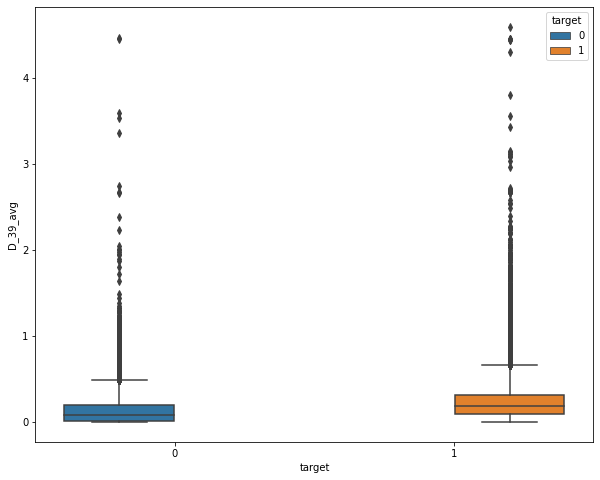

In [3]:
X = train_deli[['customer_ID', 'D_39', 'target']]

data_1 = pd.DataFrame(X.groupby(['customer_ID'])['D_39', 'target'].mean())
data_1['customer_ID'] = data_1.index
data_1 = data_1.reset_index(drop = True)
data_1 = data_1[['customer_ID', 'target', 'D_39']]
data_1.columns = ['customer_ID', 'target', 'D_39_avg']

plt.figure(figsize = (10, 8))
plot = sns.boxplot(x = 'target', y = 'D_39_avg', hue = 'target', data = data_1)

In [ ]:
data_1.head()

In [ ]:
X['customer_ID'][X['target'] == 0].unique()

In [ ]:
X['customer_ID'][X['target'] == 1].unique()

In [ ]:
A = X[X['customer_ID'] == '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5']
pd.Series(A['D_39'].to_list()).pct_change().mean()

In [ ]:
B = X[X['customer_ID'] == '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6']
pd.Series(B['D_39'].to_list()).pct_change().mean()

In [ ]:
Z = pd.DataFrame(X.groupby(['customer_ID', 'target'])['D_39'].pct_change())
Z.head()

In [ ]:
X.groupby('customer_ID')['D_39'].median()

In [39]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean()))
Z['customer_ID'] = Z.index
Z = Z.reset_index(drop = True)
Z.columns = ['D_30_change', 'customer_ID']
Z

,D_30_change,customer_ID
0,2.032724,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,29.727982,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
2,1.251917,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
3,10.712202,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...
4,71.418191,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...
5,21.982338,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...


In [73]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

# Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: x.iloc[[0, -1]].pct_change()))
Z = pd.DataFrame(Y.groupby(['customer_ID'])['D_39'].apply(lambda x: pd.Series(x.iloc[[0, -1]].to_list()).pct_change())).unstack()
Z = Z.drop(columns = ('D_39', 0), axis = 1)
Z['customer_ID'] = Z.index
Z = Z.reset_index(drop = True)
Z.columns = ['D_39_change_first_last', 'customer_ID']
Z

,D_39_change_first_last,customer_ID
0,4.258526,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,-0.534758,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
2,5.607792,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
3,1906.726027,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...
4,0.992248,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...
5,0.444122,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...


In [67]:
Z.columns

MultiIndex([('D_39', 0),
            ('D_39', 1)],
           )

In [ ]:
df['new_score'] df.apply(lambda row: row['senti_score'][0], axis=1)

In [36]:
Z.index[['customer_ID']]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexes/multi.py:1922: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_codes = [level_codes[key] for level_codes in self.codes]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
Z['customer_ID'][0]

('0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', 0)

In [17]:
Z['customer_ID'][1]

('0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', 12)

In [ ]:
Y.groupby(['customer_ID', 'target'])['D_39'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean())

## Feaure Engineering of D_41

In [ ]:
X = train_deli[['customer_ID', 'D_41', 'target']]

data_1 = pd.DataFrame(X.groupby(['customer_ID'])['D_41', 'target'].mean())
data_1['customer_ID'] = data_1.index
data_1 = data_1.reset_index(drop = True)
data_1 = data_1[['customer_ID', 'target', 'D_41']]
data_1.columns = ['customer_ID', 'target', 'D_41_avg']

plt.figure(figsize = (10, 8))
plot = sns.boxplot(x = 'target', y = 'D_41_avg', hue = 'target', data = data_1)

In [ ]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

Z = pd.DataFrame(Y.groupby(['customer_ID', 'target'])['D_41'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean()))
Z

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
X.describe()

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Delinquency_Features.csv')
data.head()

,customer_ID,target,D_39_mean,D_39_median,D_39_change,D_39_change_first_last
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.010704,0.002483,2.032724,4.258526
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.215200,0.211700,29.727982,-0.534758
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.004180,0.004230,1.251917,5.607792
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.048860,0.007423,12.665915,-0.995969
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.004642,0.004147,20.863360,-0.152060


In [77]:
data.describe()

,target,D_39_mean,D_39_median,D_39_change,D_39_change_first_last
count,458913.000000,458913.000000,458913.000000,4.537930e+05,4.589130e+05
mean,0.258934,0.151704,0.098533,inf,1.345199e+02
std,0.438050,0.164873,0.163630,NaN,1.442959e+04
min,0.000000,0.000001,0.000001,-9.999700e-01,-9.999997e-01
25%,0.000000,0.019600,0.006073,2.364822e+00,-5.723301e-01
50%,0.000000,0.109800,0.009490,8.922835e+00,2.715311e-01
75%,1.000000,0.230500,0.148200,2.285594e+01,7.075666e+00
max,1.000000,4.594000,4.450000,inf,8.527871e+06


In [78]:
data.groupby('target')['D_39_change_first_last'].mean()

target
0     61.861403
1    342.468153
Name: D_39_change_first_last, dtype: float64

In [79]:
data.groupby('target')['D_39_change_first_last'].median()

target
0    0.080460
1    2.728495
Name: D_39_change_first_last, dtype: float64

In [80]:
data.groupby('target')['D_39_change_first_last'].max()

target
0    1089535.0
1    8527871.0
Name: D_39_change_first_last, dtype: float64

In [81]:
data.groupby('target')['D_39_change_first_last'].min()

target
0   -1.000000
1   -0.999996
Name: D_39_change_first_last, dtype: float64

<AxesSubplot:xlabel='target', ylabel='D_39_change_first_last'>

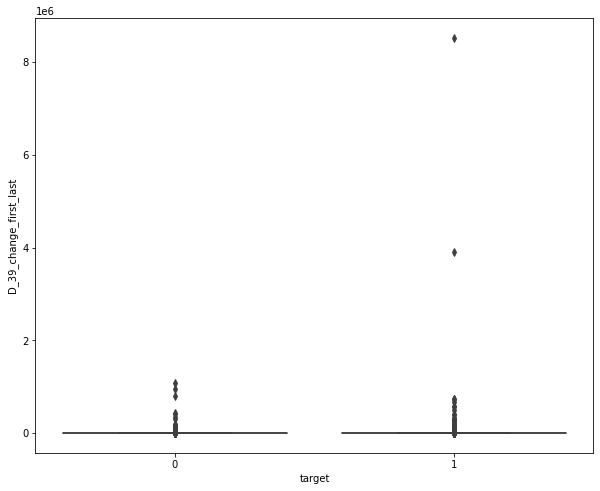

In [76]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'target', y = 'D_39_change_first_last', data = data)

In [94]:
data[data['D_39_change_first_last'] > 1000000].reset_index(drop = True)

,customer_ID,target,D_39_mean,D_39_median,D_39_change,D_39_change_first_last
0,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,1,0.8506,0.888000,195731.723043,3.897050e+06
1,cb60926951b2d849c2432e04433db7f449d1848df59ece...,1,0.1708,0.003904,32816.094284,8.527871e+06
2,fe7ab6c3cc08c85a0043862639616220b7286b38e16ded...,0,0.2500,0.007270,1179.992105,1.089535e+06


In [89]:
data[data['D_39_change_first_last'] > 1000000].reset_index(drop = True)['customer_ID'][0]

'8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6327ba0366d74d36571'

In [91]:
X[X['customer_ID'] == '8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6327ba0366d74d36571']

,customer_ID,D_39,target
2975082,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,4.172325e-07,1
2975083,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,2.449951e-01,1
2975084,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,1.531250e+00,1
2975085,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,1.625977e+00,1


In [92]:
train[train['customer_ID'] == '8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6327ba0366d74d36571']

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2975082,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,2017-12-24,0.503906,4.172325e-07,0.183716,0.001695,0.000724,0.134766,0.493896,0.001748,0.094727,NaN,NaN,0.071533,0.008896,0.046021,0.008064,NaN,0.230469,NaN,NaN,0.218994,0.167236,1.005859,0.075623,0.007374,0.639160,0.109070,1.004883,NaN,-0.002939,NaN,0.025955,0.166138,0.002974,1.001953,0.002424,0.218262,0.066345,0.253662,0.003059,0.603516,0.318115,0.004009,0.001052,0.003218,0.233032,0.509766,1.007812,0.270020,0.006340,0.480469,NaN,XZ,O,1.135742,0.091553,1.004883,0.311279,0.001534,NaN,0.060638,6.0,0.186523,0.007065,0.001072,0.001965,0.005135,0.007935,0.009544,0.001393,0.007919,0.407471,0.151733,NaN,0.951660,0.005989,0.070618,NaN,0.006248,0.006493,0.006794,0.406982,0.884766,NaN,0.008698,0.008461,NaN,0.001837,0.001136,0.001427,0.004379,0.005718,0.003338,NaN,0.002045,1.008789,0.116211,0.007450,0.001987,0.003553,0.000282,0.004623,0.000296,0.007935,0.0,0.001924,0.000975,NaN,0.003521,0.003759,NaN,1,0.005806,0.005024,0.000035,0.001433,0.006844,0.007168,0.003855,0.008987,0.007275,0.000687,0.003674,0.003519,0.005657,0.005169,0.003258,0.001860,0.000003,0.966797,0.130981,0.979004,0.969727,0.504395,0.449951,1.002930,0.964844,0.241333,NaN,0.335449,0.007858,0.183838,NaN,NaN,2.0,NaN,0.005768,NaN,NaN,NaN,0.009216,0.005642,0.468262,0.002064,1.0,0.401855,0.0,6.0,0.397705,0.383301,0.0,0.518555,0.434814,0.008453,0.279541,0.005287,1.0,0.001135,1.008789,1.001953,0.009529,NaN,0.000248,0.006695,NaN,0.004807,0.007755,NaN,NaN,NaN,NaN,NaN,0.002739,0.004330,0.005005,NaN,0.003002,0.005276,0.006443,1
2975083,8960a9861e834c1036e84c6f94db37ca5ca2a4325582c6...,2018-01-15,0.511230,2.449951e-01,0.190186,0.100586,0.000637,0.141724,0.353027,0.137329,0.092102,NaN,NaN,0.066589,0.012444,0.054749,0.001716,NaN,0.227905,NaN,NaN,0.037537,0.185425,1.000000,0.074463,0.009613,0.667480,0.106812,1.007812,NaN,0.036407,NaN,0.022476,0.178345,0.002190,1.003906,0.003397,0.217407,0.060181,0.324219,NaN,0.596680,0.321045,0.000015,0.000839,0.009758,0.245361,0.542969,1.001953,0.271729,0.008476,0.563477,NaN,XZ,O,0.009850,0.171021,0.928223,0.312500,0.003687,NaN,0.122314,6.0,0.187012,0.008232,0.005402,0.005547,0.003101,0.000247,0.008614,0.003637,0.006207,0.303223,0.155396,NaN,0.957031,0.008255,0.073425,NaN,0.001757,0.008553,0.000719,0.431885,0.002808,NaN,0.008125,0.007587,NaN,0.001583,0.008278,0.004814,0.003895,0.001104,0.000992,NaN,0.007965,1.004883,0.116333,0.008072,0.000518,0.000895,0.006927,0.000325,0.002859,0.006439,0.0,0.003078,0.007393,NaN,0.005901,0.004524,NaN,1,0.008141,0.000730,0.004337,0.000671,0.005985,0.000791,0.002811,0.004833,0.007751,0.007687,0.009789,0.009308,0.002041,0.006683,0.000645,0.006401,0.001289,0.973145,0.138672,0.976562,0.972168,0.506836,0.454590,1.002930,0.969238,0.254883,NaN,0.339355,0.002893,0.188354,NaN,NaN,4.0,NaN,0.000594,NaN,NaN,NaN,0.006302,0.008156,0.576172,0.002512,1.0,0.409180,0.0,6.0,0.398682,0.381348,0.0,0.517578,0.432861,0.007732,0.279297,0.002554,1.0,0.006264,1.008789,1.008789,0.001872,NaN,0.008804,0.003366,NaN,0.007259,0.003290

In [103]:
train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,5.257132e+06,5.531451e+06,5.529434e+06,5.531451e+06,5.531451e+06,4.319752e+06,5.531451e+06,4.812726e+06,5.455340e+05,5.531218e+06,5.531451e+06,5.509183e+06,2.389049e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.501888e+06,5.229959e+06,5.531451e+06,1.446866e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.531451e+06,5.531451e+06,5.346648e+06,2.540508e+06,5.481932e+06,5.531451e+06,5.531451e+06,2.597808e+06,5.531451e+06,5.424726e+06,5.531451e+06,4.933399e+06,5.524528e+06,5.531451e+06,4.773290e+06,5.531451e+06,5.529435e+06,2.393853e+06,5.531451e+06,5.529435e+06,623354.0,5.529435e+06,5314948.0,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.529435e+06,5.436534e+06,5.531451e+06,5.507743e+06,5.531451e+06,5.531451e+06,55856.000000,5.531451e+06,5.509678e+06,5.531451e+06,6.224970e+05,5.531451e+06,5.531450e+06,3.017539e+06,5.524528e+06,5.529435e+06,5.257132e+06,5.455512e+06,5.531451e+06,3.125330e+05,5.531451e+06,5.509678e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.505764e+06,1.472837e+06,5.531451e+06,5.531395e+06,5.531451e+06,5.531451e+06,5.336978e+06,5.531450e+06,5.531451e+06,5.501888e+06,5.531451e+06,381416.000000,5529435.0,5.531451e+06,5.531451e+06,3865.000000,5.531451e+06,5.531451e+06,6004.000000,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531376e+06,5.531451e+06,5.529435e+06,5.501888e+06,5.531451e+06,5.531451e+06,5.374235e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.512427e+06,5.531006e+06,5.512858e+06,5.518604e+06,5.530817e+06,5.490796e+06,5.429903e+06,5.429903e+06,2.510020e+06,5.413490e+05,5.429903e+06,5.531451e+06,5.531395e+06,609305.000000,5.402748e+06,5529435.0,2.893800e+04,5.529854e+06,31334.000000,31334.000000,33632.000000,5.528801e+06,5.531398e+06,4.130516e+06,5.354735e+06,5354735.0,5.354735e+06,5.354735e+06,5354735.0,5.354735e+06,5.354735e+06,5354735.0,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5.354735e+06,5414635.0,5.531451e+06,5.429903e+06,5.429903e+06,5.530761e+06,71478.000000,5.429903e+06,5.429903e+06,542577.000000,5.488735e+06,5.531451e+06,194699.000000,1.946990e+05,1.946990e+05,194699.000000,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06,5.531451e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.294800e-03,NaN,NaN,NaN,NaN,NaN,5.706787e-03,NaN,NaN,NaN,NaN,NaN,0.032623,NaN,NaN,NaN,0.991699,5.527496e-03,5.294800e-03,0.172729,9.969435e-01,5.294800e-03,NaN,NaN,NaN,NaN,NaN,NaN,6.355286e-03,8.552551e-03,5.519867e-03,NaN,NaN,NaN,NaN,NaN,8.178711e-03,NaN,NaN,NaN,N

## kNN Imputation

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 550)

data = pd.read_csv('Delinquency_Features.csv')
data.head()

,customer_ID,target,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_std,D_39_pct_values_above_mean,D_39_avg_pct_change,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_41_avg_pct_change,D_44_mean,D_44_median,D_44_min,D_44_max,D_44_range,D_44_IQR,D_44_std,D_44_pct_values_above_mean,D_44_avg_pct_change,D_45_mean,D_45_median,D_45_min,D_45_max,D_45_range,D_45_IQR,D_45_std,D_45_pct_values_above_mean,D_45_avg_pct_change,D_47_mean,D_47_median,D_47_min,D_47_max,D_47_range,D_47_IQR,D_47_std,D_47_pct_values_above_mean,D_47_avg_pct_change,D_51_mean,D_51_median,D_51_min,D_51_max,D_51_range,D_51_IQR,D_51_std,D_51_pct_values_above_mean,D_51_avg_pct_change,D_52_mean,D_52_median,D_52_min,D_52_max,D_52_range,D_52_IQR,D_52_std,D_52_pct_values_above_mean,D_52_avg_pct_change,D_54_mean,D_54_median,D_54_min,D_54_max,D_54_range,D_54_IQR,D_54_std,D_54_pct_values_above_mean,D_54_avg_pct_change,D_55_mean,D_55_median,D_55_min,D_55_max,D_55_range,D_55_IQR,D_55_std,D_55_pct_values_above_mean,D_55_avg_pct_change,D_58_mean,D_58_median,D_58_min,D_58_max,D_58_range,D_58_IQR,D_58_std,D_58_pct_values_above_mean,D_58_avg_pct_change,D_59_mean,D_59_median,D_59_min,D_59_max,D_59_range,D_59_IQR,D_59_std,D_59_pct_values_above_mean,D_59_avg_pct_change,D_60_mean,D_60_median,D_60_min,D_60_max,D_60_range,D_60_IQR,D_60_std,D_60_pct_values_above_mean,D_60_avg_pct_change,D_65_mean,D_65_median,D_65_min,D_65_max,D_65_range,D_65_IQR,D_65_std,D_65_pct_values_above_mean,D_65_avg_pct_change,D_68_mean,D_68_median,D_68_min,D_68_max,D_68_range,D_68_IQR,D_68_std,D_68_pct_values_above_mean,D_68_avg_pct_change,D_69_mean,D_69_median,D_69_min,D_69_max,D_69_range,D_69_IQR,D_69_std,D_69_pct_values_above_mean,D_69_avg_pct_change,D_70_mean,D_70_median,D_70_min,D_70_max,D_70_range,D_70_IQR,D_70_std,D_70_pct_values_above_mean,D_70_avg_pct_change,D_71_mean,D_71_median,D_71_min,D_71_max,D_71_range,D_71_IQR,D_71_std,D_71_pct_values_above_mean,D_71_avg_pct_change,D_72_mean,D_72_median,D_72_min,D_72_max,D_72_range,D_72_IQR,D_72_std,D_72_pct_values_above_mean,D_72_avg_pct_change,D_74_mean,D_74_median,D_74_min,D_74_max,D_74_range,D_74_IQR,D_74_std,D_74_pct_values_above_mean,D_74_avg_pct_change,D_75_mean,D_75_median,D_75_min,D_75_max,D_75_range,D_75_IQR,D_75_std,D_75_pct_values_above_mean,D_75_avg_pct_change,D_78_mean,D_78_median,D_78_min,D_78_max,D_78_range,D_78_IQR,D_78_std,D_78_pct_values_above_mean,D_78_avg_pct_change,D_79_mean,D_79_median,D_79_min,D_79_max,D_79_range,D_79_IQR,D_79_std,D_79_pct_values_above_mean,D_79_avg_pct_change,D_80_mean,D_80_median,D_80_min,D_80_max,D_80_range,D_80_IQR,D_80_std,D_80_pct_values_above_mean,D_80_avg_pct_change,D_81_mean,D_81_median,D_81_min,D_81_max,D_81_range,D_81_IQR,D_81_std,D_81_pct_values_above_mean,D_81_avg_pct_change,D_83_mean,D_83_median,D_83_min,D_83_max,D_83_range,D_83_IQR,D_83_std,D_83_pct_values_above_mean,D_83_avg_pct_change,D_84_mean,D_84_median,D_84_min,D_84_max,D_84_range,D_84_IQR,D_84_std,D_84_pct_values_above_mean,D_84_avg_pct_change,D_86_mean,D_86_median,D_86_min,D_86_max,D_86_range,D_86_IQR,D_86_std,D_86_pct_values_above_mean,D_86_avg_pct_change,D_89_mean,D_89_median,D_89_min,D_89_max,D_89_range,D_89_IQR,D_89_std,D_89_pct_values_above_mean,D_89_avg_pct_change,D_91_mean,D_91_median,D_91_min,D_91_max,D_91_range,D_91_IQR,D_91_std,D_91_pct_values_above_mean,D_91_avg_pct_change,D_92_mean,D_92_median,D_92_min,D_92_max,D_92_range,D_92_IQR,D_92_std,D_92_pct_values_above_mean,D_92_avg_pct_change,D_93_mean,D_93_median,D_93_min,D_93_max,D_93_range,D_93_IQR,D_93_std,D_93_pct_values_above_mean,D_93_avg_pct_change,D_94_mean,D_94_median,D_94_min,D_94_max,D_94_range,D_94_IQR,D_94_std,D_94_pct_values_above_mean,D_94_avg_pct_change,D_96_mean,D_96_median,D_96_min,D_96_max,D_96_range,D_96_IQR,D_96_std,D_96_pct_values_above_mean,D_96_avg_pct_change,D_102_mean,D_102_median,D_102_min,D_102_max,D_102_range,D_102_IQR,D_102_std,D_102_pct_values_above_mean,D_102_avg_pct_change,D_103_mean,D_103_median,D_1

In [6]:
data.describe()

,target,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_std,D_39_pct_values_above_mean,D_39_avg_pct_change,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_41_avg_pct_change,D_44_mean,D_44_median,D_44_min,D_44_max,D_44_range,D_44_IQR,D_44_std,D_44_pct_values_above_mean,D_44_avg_pct_change,D_45_mean,D_45_median,D_45_min,D_45_max,D_45_range,D_45_IQR,D_45_std,D_45_pct_values_above_mean,D_45_avg_pct_change,D_47_mean,D_47_median,D_47_min,D_47_max,D_47_range,D_47_IQR,D_47_std,D_47_pct_values_above_mean,D_47_avg_pct_change,D_51_mean,D_51_median,D_51_min,D_51_max,D_51_range,D_51_IQR,D_51_std,D_51_pct_values_above_mean,D_51_avg_pct_change,D_52_mean,D_52_median,D_52_min,D_52_max,D_52_range,D_52_IQR,D_52_std,D_52_pct_values_above_mean,D_52_avg_pct_change,D_54_mean,D_54_median,D_54_min,D_54_max,D_54_range,D_54_IQR,D_54_std,D_54_pct_values_above_mean,D_54_avg_pct_change,D_55_mean,D_55_median,D_55_min,D_55_max,D_55_range,D_55_IQR,D_55_std,D_55_pct_values_above_mean,D_55_avg_pct_change,D_58_mean,D_58_median,D_58_min,D_58_max,D_58_range,D_58_IQR,D_58_std,D_58_pct_values_above_mean,D_58_avg_pct_change,D_59_mean,D_59_median,D_59_min,D_59_max,D_59_range,D_59_IQR,D_59_std,D_59_pct_values_above_mean,D_59_avg_pct_change,D_60_mean,D_60_median,D_60_min,D_60_max,D_60_range,D_60_IQR,D_60_std,D_60_pct_values_above_mean,D_60_avg_pct_change,D_65_mean,D_65_median,D_65_min,D_65_max,D_65_range,D_65_IQR,D_65_std,D_65_pct_values_above_mean,D_65_avg_pct_change,D_68_mean,D_68_median,D_68_min,D_68_max,D_68_range,D_68_IQR,D_68_std,D_68_pct_values_above_mean,D_68_avg_pct_change,D_69_mean,D_69_median,D_69_min,D_69_max,D_69_range,D_69_IQR,D_69_std,D_69_pct_values_above_mean,D_69_avg_pct_change,D_70_mean,D_70_median,D_70_min,D_70_max,D_70_range,D_70_IQR,D_70_std,D_70_pct_values_above_mean,D_70_avg_pct_change,D_71_mean,D_71_median,D_71_min,D_71_max,D_71_range,D_71_IQR,D_71_std,D_71_pct_values_above_mean,D_71_avg_pct_change,D_72_mean,D_72_median,D_72_min,D_72_max,D_72_range,D_72_IQR,D_72_std,D_72_pct_values_above_mean,D_72_avg_pct_change,D_74_mean,D_74_median,D_74_min,D_74_max,D_74_range,D_74_IQR,D_74_std,D_74_pct_values_above_mean,D_74_avg_pct_change,D_75_mean,D_75_median,D_75_min,D_75_max,D_75_range,D_75_IQR,D_75_std,D_75_pct_values_above_mean,D_75_avg_pct_change,D_78_mean,D_78_median,D_78_min,D_78_max,D_78_range,D_78_IQR,D_78_std,D_78_pct_values_above_mean,D_78_avg_pct_change,D_79_mean,D_79_median,D_79_min,D_79_max,D_79_range,D_79_IQR,D_79_std,D_79_pct_values_above_mean,D_79_avg_pct_change,D_80_mean,D_80_median,D_80_min,D_80_max,D_80_range,D_80_IQR,D_80_std,D_80_pct_values_above_mean,D_80_avg_pct_change,D_81_mean,D_81_median,D_81_min,D_81_max,D_81_range,D_81_IQR,D_81_std,D_81_pct_values_above_mean,D_81_avg_pct_change,D_83_mean,D_83_median,D_83_min,D_83_max,D_83_range,D_83_IQR,D_83_std,D_83_pct_values_above_mean,D_83_avg_pct_change,D_84_mean,D_84_median,D_84_min,D_84_max,D_84_range,D_84_IQR,D_84_std,D_84_pct_values_above_mean,D_84_avg_pct_change,D_86_mean,D_86_median,D_86_min,D_86_max,D_86_range,D_86_IQR,D_86_std,D_86_pct_values_above_mean,D_86_avg_pct_change,D_89_mean,D_89_median,D_89_min,D_89_max,D_89_range,D_89_IQR,D_89_std,D_89_pct_values_above_mean,D_89_avg_pct_change,D_91_mean,D_91_median,D_91_min,D_91_max,D_91_range,D_91_IQR,D_91_std,D_91_pct_values_above_mean,D_91_avg_pct_change,D_92_mean,D_92_median,D_92_min,D_92_max,D_92_range,D_92_IQR,D_92_std,D_92_pct_values_above_mean,D_92_avg_pct_change,D_93_mean,D_93_median,D_93_min,D_93_max,D_93_range,D_93_IQR,D_93_std,D_93_pct_values_above_mean,D_93_avg_pct_change,D_94_mean,D_94_median,D_94_min,D_94_max,D_94_range,D_94_IQR,D_94_std,D_94_pct_values_above_mean,D_94_avg_pct_change,D_96_mean,D_96_median,D_96_min,D_96_max,D_96_range,D_96_IQR,D_96_std,D_96_pct_values_above_mean,D_96_avg_pct_change,D_102_mean,D_102_median,D_102_min,D_102_max,D_102_range,D_102_IQR,D_102_std,D_102_pct_values_above_mean,D_102_avg_pct_change,D_103_mean,D_103_median,D_103_min,D_103

In [2]:
import numpy as np

data1 = data.drop(columns = ['customer_ID', 'target'], axis = 1)

x = data1.columns.to_series()[np.isinf(data1).any()]
x.index

Index(['D_39_avg_pct_change', 'D_41_avg_pct_change', 'D_44_avg_pct_change',
       'D_45_avg_pct_change', 'D_51_avg_pct_change', 'D_55_avg_pct_change',
       'D_58_avg_pct_change', 'D_60_avg_pct_change', 'D_65_std',
       'D_65_avg_pct_change', 'D_68_avg_pct_change', 'D_69_mean', 'D_69_std',
       'D_69_avg_pct_change', 'D_70_avg_pct_change', 'D_71_avg_pct_change',
       'D_72_avg_pct_change', 'D_74_avg_pct_change', 'D_75_avg_pct_change',
       'D_78_avg_pct_change', 'D_79_avg_pct_change', 'D_80_avg_pct_change',
       'D_81_avg_pct_change', 'D_83_avg_pct_change', 'D_84_avg_pct_change',
       'D_86_avg_pct_change', 'D_89_avg_pct_change', 'D_91_avg_pct_change',
       'D_92_avg_pct_change', 'D_93_avg_pct_change', 'D_94_avg_pct_change',
       'D_96_avg_pct_change', 'D_102_avg_pct_change', 'D_103_avg_pct_change',
       'D_104_avg_pct_change', 'D_107_avg_pct_change', 'D_109_avg_pct_change',
       'D_113_avg_pct_change', 'D_118_avg_pct_change', 'D_123_avg_pct_change',
       'D_125

In [3]:
data2 = data.drop(columns = x.index, axis = 1)
data2.head()

,customer_ID,target,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_std,D_39_pct_values_above_mean,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_44_mean,D_44_median,D_44_min,D_44_max,D_44_range,D_44_IQR,D_44_std,D_44_pct_values_above_mean,D_45_mean,D_45_median,D_45_min,D_45_max,D_45_range,D_45_IQR,D_45_std,D_45_pct_values_above_mean,D_47_mean,D_47_median,D_47_min,D_47_max,D_47_range,D_47_IQR,D_47_std,D_47_pct_values_above_mean,D_47_avg_pct_change,D_51_mean,D_51_median,D_51_min,D_51_max,D_51_range,D_51_IQR,D_51_std,D_51_pct_values_above_mean,D_52_mean,D_52_median,D_52_min,D_52_max,D_52_range,D_52_IQR,D_52_std,D_52_pct_values_above_mean,D_52_avg_pct_change,D_54_mean,D_54_median,D_54_min,D_54_max,D_54_range,D_54_IQR,D_54_std,D_54_pct_values_above_mean,D_54_avg_pct_change,D_55_mean,D_55_median,D_55_min,D_55_max,D_55_range,D_55_IQR,D_55_std,D_55_pct_values_above_mean,D_58_mean,D_58_median,D_58_min,D_58_max,D_58_range,D_58_IQR,D_58_std,D_58_pct_values_above_mean,D_59_mean,D_59_median,D_59_min,D_59_max,D_59_range,D_59_IQR,D_59_std,D_59_pct_values_above_mean,D_59_avg_pct_change,D_60_mean,D_60_median,D_60_min,D_60_max,D_60_range,D_60_IQR,D_60_std,D_60_pct_values_above_mean,D_65_mean,D_65_median,D_65_min,D_65_max,D_65_range,D_65_IQR,D_65_pct_values_above_mean,D_68_mean,D_68_median,D_68_min,D_68_max,D_68_range,D_68_IQR,D_68_std,D_68_pct_values_above_mean,D_69_median,D_69_min,D_69_max,D_69_range,D_69_IQR,D_69_pct_values_above_mean,D_70_mean,D_70_median,D_70_min,D_70_max,D_70_range,D_70_IQR,D_70_std,D_70_pct_values_above_mean,D_71_mean,D_71_median,D_71_min,D_71_max,D_71_range,D_71_IQR,D_71_std,D_71_pct_values_above_mean,D_72_mean,D_72_median,D_72_min,D_72_max,D_72_range,D_72_IQR,D_72_std,D_72_pct_values_above_mean,D_74_mean,D_74_median,D_74_min,D_74_max,D_74_range,D_74_IQR,D_74_std,D_74_pct_values_above_mean,D_75_mean,D_75_median,D_75_min,D_75_max,D_75_range,D_75_IQR,D_75_std,D_75_pct_values_above_mean,D_78_mean,D_78_median,D_78_min,D_78_max,D_78_range,D_78_IQR,D_78_std,D_78_pct_values_above_mean,D_79_mean,D_79_median,D_79_min,D_79_max,D_79_range,D_79_IQR,D_79_std,D_79_pct_values_above_mean,D_80_mean,D_80_median,D_80_min,D_80_max,D_80_range,D_80_IQR,D_80_std,D_80_pct_values_above_mean,D_81_mean,D_81_median,D_81_min,D_81_max,D_81_range,D_81_IQR,D_81_std,D_81_pct_values_above_mean,D_83_mean,D_83_median,D_83_min,D_83_max,D_83_range,D_83_IQR,D_83_std,D_83_pct_values_above_mean,D_84_mean,D_84_median,D_84_min,D_84_max,D_84_range,D_84_IQR,D_84_std,D_84_pct_values_above_mean,D_86_mean,D_86_median,D_86_min,D_86_max,D_86_range,D_86_IQR,D_86_std,D_86_pct_values_above_mean,D_89_mean,D_89_median,D_89_min,D_89_max,D_89_range,D_89_IQR,D_89_std,D_89_pct_values_above_mean,D_91_mean,D_91_median,D_91_min,D_91_max,D_91_range,D_91_IQR,D_91_std,D_91_pct_values_above_mean,D_92_mean,D_92_median,D_92_min,D_92_max,D_92_range,D_92_IQR,D_92_std,D_92_pct_values_above_mean,D_93_mean,D_93_median,D_93_min,D_93_max,D_93_range,D_93_IQR,D_93_std,D_93_pct_values_above_mean,D_94_mean,D_94_median,D_94_min,D_94_max,D_94_range,D_94_IQR,D_94_std,D_94_pct_values_above_mean,D_96_mean,D_96_median,D_96_min,D_96_max,D_96_range,D_96_IQR,D_96_std,D_96_pct_values_above_mean,D_102_mean,D_102_median,D_102_min,D_102_max,D_102_range,D_102_IQR,D_102_std,D_102_pct_values_above_mean,D_103_mean,D_103_median,D_103_min,D_103_max,D_103_range,D_103_IQR,D_103_std,D_103_pct_values_above_mean,D_104_mean,D_104_median,D_104_min,D_104_max,D_104_range,D_104_IQR,D_104_std,D_104_pct_values_above_mean,D_107_mean,D_107_median,D_107_min,D_107_max,D_107_range,D_107_IQR,D_107_std,D_107_pct_values_above_mean,D_109_mean,D_109_median,D_109_min,D_109_max,D_109_range,D_109_IQR,D_109_std,D_109_pct_values_above_mean,D_112_mean,D_112_median,D_112_min,D_112_max,D_112_range,D_112_IQR,D_112_std,D_112_pct_values_above_mean,D_112_avg_pct_change,D_113_mean,D_113_median,D_113_min,D_113_max,D_113_range,D_113_IQR,D_113_std,D_113_pct_values_above_mean,D_115_mean,

In [4]:
a = list(data.columns)
b = [x for x in a if x.startswith('D_41')]
b

['D_41_mean',
 'D_41_median',
 'D_41_min',
 'D_41_max',
 'D_41_range',
 'D_41_IQR',
 'D_41_std',
 'D_41_pct_values_above_mean',
 'D_41_avg_pct_change']

In [5]:
data[b].isna().any()

D_41_mean                      True
D_41_median                    True
D_41_min                       True
D_41_max                       True
D_41_range                    False
D_41_IQR                       True
D_41_std                       True
D_41_pct_values_above_mean    False
D_41_avg_pct_change            True
dtype: bool

In [6]:
sum(data[b].isna().any())

7

In [26]:
data[b].columns.to_series()

D_41_mean                                      D_41_mean
D_41_median                                  D_41_median
D_41_min                                        D_41_min
D_41_max                                        D_41_max
D_41_range                                    D_41_range
D_41_IQR                                        D_41_IQR
D_41_std                                        D_41_std
D_41_pct_values_above_mean    D_41_pct_values_above_mean
D_41_avg_pct_change                  D_41_avg_pct_change
dtype: object

In [28]:
np.isinf(data[b]).any()

D_41_mean                     False
D_41_median                   False
D_41_min                      False
D_41_max                      False
D_41_range                    False
D_41_IQR                      False
D_41_std                      False
D_41_pct_values_above_mean    False
D_41_avg_pct_change            True
dtype: bool

In [30]:
import numpy as np
# data[b].isna().any()
x = data[b].columns.to_series()[np.isinf(data[b]).any()]
x[0]

'D_41_avg_pct_change'

In [14]:
data[b].isna().any().sum()

7

In [20]:
X = data[b]
X.describe()

,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_41_avg_pct_change
count,458882.000000,458882.000000,458882.000000,458882.000000,458913.000000,456928.000000,458821.000000,458913.000000,4.588210e+05
mean,0.058600,0.046369,0.013215,0.152209,0.138986,0.051033,0.046455,0.464859,inf
std,0.167447,0.160931,0.085721,0.361185,0.324837,0.137900,0.108046,0.128324,NaN
min,0.000005,0.000005,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,-9.998150e-01
25%,0.004616,0.004311,0.000278,0.009064,0.008095,0.003437,0.002651,0.384615,4.464397e-01
50%,0.005337,0.005428,0.000681,0.009644,0.008980,0.004566,0.003029,0.461538,1.174197e+00
75%,0.006901,0.006844,0.001454,0.009979,0.009804,0.006098,0.003719,0.538462,3.832071e+00
max,5.730469,6.167969,4.636719,8.992188,7.507812,6.710577,3.804688,0.923077,inf


In [10]:
X = data[b]
X = X.drop(columns = ['D_41_avg_pct_change'], axis = 1)

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 5)
a = knn_imputer.fit_transform(X)

In [11]:
a

array([[5.02014160e-03, 4.65393066e-03, 6.85214996e-04, ...,
        5.74588776e-03, 3.33023071e-03, 4.61538462e-01],
       [4.98962402e-03, 5.40161133e-03, 7.28130341e-04, ...,
        4.63104248e-03, 2.89916992e-03, 5.38461538e-01],
       [6.83975220e-03, 8.01086426e-03, 1.65367126e-03, ...,
        4.76837158e-03, 2.68554688e-03, 6.92307692e-01],
       ...,
       [1.82861328e-01, 1.72485352e-01, 3.77416611e-04, ...,
        2.50888824e-01, 2.13745117e-01, 4.61538462e-01],
       [4.92095947e-03, 4.42504883e-03, 9.71317291e-04, ...,
        4.52613831e-03, 2.85720825e-03, 4.61538462e-01],
       [4.23812866e-03, 3.77845764e-03, 8.80241394e-04, ...,
        3.09753418e-03, 2.41661072e-03, 4.61538462e-01]])

In [17]:
m = data[b].drop(columns = ['D_41_avg_pct_change'], axis = 1)
m.head()

,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean
0,0.005020,0.004654,0.000685,0.009857,0.009171,0.005746,0.003330,0.461538
1,0.004990,0.005402,0.000728,0.009514,0.008789,0.004631,0.002899,0.538462
2,0.006840,0.008011,0.001654,0.009560,0.007904,0.004768,0.002686,0.692308
3,0.005489,0.004799,0.001972,0.008667,0.006695,0.003357,0.002043,0.461538
4,0.005352,0.005905,0.000231,0.009697,0.009468,0.004778,0.003267,0.538462


In [18]:
type(a)

numpy.ndarray

In [20]:
a.shape

(458913, 8)

In [23]:
a[:, 0]

array([0.00502014, 0.00498962, 0.00683975, ..., 0.18286133, 0.00492096,
       0.00423813])

In [24]:
m.iloc[:, 0] = a[:, 0]

In [25]:
m.describe()

,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_41
count,458913.000000,458882.000000,458882.000000,458882.000000,458913.000000,456928.000000,458821.000000,458913.000000,458913.000000
mean,0.058599,0.046369,0.013215,0.152209,0.138986,0.051033,0.046455,0.464859,0.046369
std,0.167442,0.160931,0.085721,0.361185,0.324837,0.137900,0.108046,0.128324,0.160926
min,0.000005,0.000005,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000005
25%,0.004616,0.004311,0.000278,0.009064,0.008095,0.003437,0.002651,0.384615,0.004311
50%,0.005337,0.005428,0.000681,0.009644,0.008980,0.004566,0.003029,0.461538,0.005428
75%,0.006905,0.006844,0.001454,0.009979,0.009804,0.006098,0.003719,0.538462,0.006844
max,5.730469,6.167969,4.636719,8.992188,7.507812,6.710577,3.804688,0.923077,6.167969


In [16]:
m

array([[5.02014160e-03, 4.65393066e-03, 6.85214996e-04, ...,
        5.74588776e-03, 3.33023071e-03, 4.61538462e-01],
       [4.98962402e-03, 5.40161133e-03, 7.28130341e-04, ...,
        4.63104248e-03, 2.89916992e-03, 5.38461538e-01],
       [6.83975220e-03, 8.01086426e-03, 1.65367126e-03, ...,
        4.76837158e-03, 2.68554688e-03, 6.92307692e-01],
       ...,
       [1.82861328e-01, 1.72485352e-01, 3.77416611e-04, ...,
        2.50888824e-01, 2.13745117e-01, 4.61538462e-01],
       [4.92095947e-03, 4.42504883e-03, 9.71317291e-04, ...,
        4.52613831e-03, 2.85720825e-03, 4.61538462e-01],
       [4.23812866e-03, 3.77845764e-03, 8.80241394e-04, ...,
        3.09753418e-03, 2.41661072e-03, 4.61538462e-01]])

In [8]:
X

,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean,D_41_avg_pct_change
0,0.005020,0.004654,0.000685,0.009857,0.009171,0.005746,0.003330,0.461538,1.234666
1,0.004990,0.005402,0.000728,0.009514,0.008789,0.004631,0.002899,0.538462,1.248120
2,0.006840,0.008011,0.001654,0.009560,0.007904,0.004768,0.002686,0.692308,0.149115
3,0.005489,0.004799,0.001972,0.008667,0.006695,0.003357,0.002043,0.461538,0.087643
4,0.005352,0.005905,0.000231,0.009697,0.009468,0.004778,0.003267,0.538462,0.567189
...,...,...,...,...,...,...,...,...,...
458908,0.003922,0.003483,0.000088,0.008499,0.008408,0.004333,0.002878,0.384615,3.839562
458909,0.005306,0.005093,0.001214,0.009438,0.008224,0.003279,0.002367,0.461538,0.359769
458910,0.182861,0.172485,0.000377,0.629395,0.628906,0.250889,0.213745,0.461538,1.434473
458911,0.004921,0.004425,0.000971,0.008972,0.008003,0.004526,0.002857,0.461538,0.466271


In [22]:
X.head()

,D_41_mean,D_41_median,D_41_min,D_41_max,D_41_range,D_41_IQR,D_41_std,D_41_pct_values_above_mean
0,0.005020,0.004654,0.000685,0.009857,0.009171,0.005746,0.003330,0.461538
1,0.004990,0.005402,0.000728,0.009514,0.008789,0.004631,0.002899,0.538462
2,0.006840,0.008011,0.001654,0.009560,0.007904,0.004768,0.002686,0.692308
3,0.005489,0.004799,0.001972,0.008667,0.006695,0.003357,0.002043,0.461538
4,0.005352,0.005905,0.000231,0.009697,0.009468,0.004778,0.003267,0.538462


In [1]:
import boto3
import pandas as pd 
import numpy as np
from sklearn.impute import KNNImputer

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

print('s3://{}/{}'.format(bucket, 'hi'))

s3://s3.Bucket(name='analytics-data-science-competitions')/hi


# Categorical Delinquency Variables

In [1]:
import boto3
import pandas as pd
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/train_data.csv'
file_key_2 = 'AmericanExpress/train_labels.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading data-files
train = pd.read_csv(file_content_stream_1, dtype = dtype_dict)
target = pd.read_csv(file_content_stream_2)

## Appending target variables
train = pd.merge(train, target, on = 'customer_ID', how = 'left')

## Selecting Deliquency categorical variables
train_deli_cat = train[['customer_ID', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']]
train_deli_cat.head()

,customer_ID,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0


In [17]:
train_deli_cat[['D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']] = train_deli_cat[['D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']].astype(str)

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
def f_cat(x):
    
    d = {}
    d['D_63_last'] = x['D_63'].iloc[-1]
    d['D_64_last'] = x['D_64'].iloc[-1]
    d['D_66_last'] = x['D_66'].iloc[-1]
    d['D_68_last'] = x['D_68'].iloc[-1]
    d['D_114_last'] = x['D_114'].iloc[-1]
    d['D_116_last'] = x['D_116'].iloc[-1]
    d['D_117_last'] = x['D_117'].iloc[-1]
    d['D_120_last'] = x['D_120'].iloc[-1]
    d['D_126_last'] = x['D_126'].iloc[-1]
    
    return pd.Series(d, index = ['D_63_last', 'D_64_last', 'D_66_last', 'D_68_last', 'D_114_last', 'D_116_last', 'D_117_last', 'D_120_last', 'D_126_last'])


W = train_deli_cat.groupby('customer_ID').apply(f_cat)
W

,D_63_last,D_64_last,D_66_last,D_68_last,D_114_last,D_116_last,D_117_last,D_120_last,D_126_last
customer_ID,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,CO,O,nan,6.0,1.0,0.0,-1.0,0.0,1.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,CO,R,nan,6.0,1.0,0.0,-1.0,0.0,1.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,CO,O,nan,3.0,1.0,0.0,6.0,0.0,1.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,CO,O,1.0,6.0,1.0,0.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,CO,U,1.0,6.0,0.0,0.0,3.0,1.0,1.0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,CO,R,nan,6.0,1.0,0.0,2.0,0.0,1.0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,CO,U,nan,5.0,1.0,0.0,-1.0,0.0,1.0


In [23]:
W['customer_ID'] = W.index
W = W.reset_index(drop = True)
W.head()

,D_63_last,D_64_last,D_66_last,D_68_last,D_114_last,D_116_last,D_117_last,D_120_last,D_126_last,customer_ID
0,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,CO,O,nan,6.0,1.0,0.0,-1.0,0.0,1.0,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
2,CO,R,nan,6.0,1.0,0.0,-1.0,0.0,1.0,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
3,CO,O,nan,3.0,1.0,0.0,6.0,0.0,1.0,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...
4,CO,O,1.0,6.0,1.0,0.0,4.0,0.0,1.0,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...


In [26]:
W['D_63_last'].value_counts()

CO    344890
CR     73178
CL     35271
XZ      3263
XM      1503
XL       808
Name: D_63_last, dtype: int64

In [27]:
W['D_64_last'].value_counts()

O    244622
U    132722
R     71532
Name: D_64_last, dtype: int64

In [28]:
W['D_66_last'].value_counts()

nan    406331
1.0     52582
Name: D_66_last, dtype: int64

In [43]:
W['D_68_last'].value_counts()

6.0    231535
5.0    105517
3.0     41898
4.0     41410
2.0     19318
1.0     10223
nan      9012
Name: D_68_last, dtype: int64

In [44]:
W['D_114_last'].value_counts()

1.0    280065
0.0    172831
nan      6017
Name: D_114_last, dtype: int64

In [45]:
W['D_116_last'].value_counts()

0.0    451564
nan      6017
1.0      1332
Name: D_116_last, dtype: int64

In [46]:
W['D_117_last'].value_counts()

-1.0    123539
3.0      97853
4.0      96781
2.0      55224
5.0      39353
6.0      30412
1.0       9734
nan       6017
Name: D_117_last, dtype: int64

In [47]:
W['D_120_last'].value_counts()

0.0    366519
1.0     86377
nan      6017
Name: D_120_last, dtype: int64

In [48]:
W['D_126_last'].value_counts()

1.0    355057
0.0    103856
Name: D_126_last, dtype: int64

In [3]:
355057 + 103856

458913

In [29]:
406331 + 52582

458913

In [41]:
train_deli_cat[train_deli_cat['D_66'] == '0.0']['customer_ID'][1408]

'0012ba67e6f054122e685070618c45c5cac9730ca60415710a629d8c5f22c58d'

In [42]:
train_deli_cat[train_deli_cat['customer_ID'] == '0012ba67e6f054122e685070618c45c5cac9730ca60415710a629d8c5f22c58d']

,customer_ID,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
1405,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,-1.0,0.0,1.0
1406,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,-1.0,0.0,1.0
1407,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,-1.0,0.0,1.0
1408,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,0.0,4.0,1.0,0.0,1.0,0.0,0.0
1409,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,1.0,0.0,-1.0
1410,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,1.0,0.0,-1.0
1411,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,1.0,0.0,-1.0
1412,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,1.0,0.0,-1.0
1413,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,4.0,1.0,0.0,1.0,0.0,-1.0
1414,0012ba67e6f054122e685070618c45c5cac9730ca60415...,CO,O,nan,5.0,1.0,0.0,1.0,0.0,0.0


In [33]:
train_deli_cat['D_66'].value_counts()

nan    4908097
1.0     617066
0.0       6288
Name: D_66, dtype: int64

In [18]:
train_deli_cat.head()

,customer_ID,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,nan,6.0,1.0,0.0,4.0,0.0,1.0


In [20]:
train_deli_cat['D_66'].value_counts()

nan    4908097
1.0     617066
0.0       6288
Name: D_66, dtype: int64

In [15]:
train_deli_cat['D_66'] = train_deli_cat['D_66'].astype(str) 

/tmp/ipykernel_22166/4065590074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_deli_cat['D_66'] = train_deli_cat['D_66'].astype('str')


In [11]:
train_deli_cat['D_63']

0          CR
1          CR
2          CR
3          CR
4          CR
           ..
5531446    CL
5531447    CL
5531448    CL
5531449    CL
5531450    CL
Name: D_63, Length: 5531451, dtype: object

In [2]:
train_deli_cat['D_63'].value_counts()

CO    4119621
CR     930133
CL     438390
XZ      25786
XM      10556
XL       6965
Name: D_63, dtype: int64

In [13]:
train_deli_cat['D_64']

0          O
1          O
2          O
3          O
4          O
          ..
5531446    O
5531447    O
5531448    O
5531449    O
5531450    O
Name: D_64, Length: 5531451, dtype: object

In [3]:
train_deli_cat['D_64'].value_counts()

O     2913244
U     1523448
R      840112
-1      37205
Name: D_64, dtype: int64

In [14]:
train_deli_cat['D_66']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
5531446   NaN
5531447   NaN
5531448   NaN
5531449   NaN
5531450   NaN
Name: D_66, Length: 5531451, dtype: float16

In [4]:
train_deli_cat['D_66'].value_counts()

1.0    617066
0.0      6288
Name: D_66, dtype: int64

In [5]:
train_deli_cat['D_68'].value_counts()

6.0    2782455
5.0    1201706
3.0     484442
4.0     477187
2.0     220111
1.0     133122
0.0      15925
Name: D_68, dtype: int64

In [6]:
train_deli_cat['D_114'].value_counts()

1.0    3316478
0.0    2038257
Name: D_114, dtype: int64

In [7]:
train_deli_cat['D_116'].value_counts()

0.0    5348109
1.0       6626
Name: D_116, dtype: int64

In [8]:
train_deli_cat['D_117'].value_counts()

-1.0    1456084
 3.0    1166400
 4.0    1138666
 2.0     666808
 5.0     459290
 6.0     344520
 1.0     122967
Name: D_117, dtype: int64

In [9]:
train_deli_cat['D_120'].value_counts()

0.0    4729723
1.0     625012
Name: D_120, dtype: int64

In [10]:
train_deli_cat['D_126'].value_counts()

 1.0    4262414
 0.0     891323
-1.0     260898
Name: D_126, dtype: int64

## Categorical Data Imputation

In [51]:
import boto3
import pandas as pd 
import numpy as np

import os
import sagemaker

sess = sagemaker.Session()

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/Delinquency_Features_Imputed.csv'
file_key_2 = 'AmericanExpress/Delinquency_Features_Categorical_Last.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Reading data-files
data_left = pd.read_csv(file_content_stream_1)
to_remove = data_left.drop(columns = ['customer_ID', 'target'], axis = 1).columns.to_series()[np.isnan(data_left.drop(columns = ['customer_ID', 'target'], axis = 1)).any()]
data_left = data_left.drop(columns = to_remove.index, axis = 1)

data_right = pd.read_csv(file_content_stream_2)

## Merging datasets
data = pd.merge(data_left, data_right, on = 'customer_ID', how = 'left')
data.head()

,customer_ID,target,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_std,D_39_pct_values_above_mean,...,D_145_pct_values_above_mean,D_63_last,D_64_last,D_66_last,D_68_last,D_114_last,D_116_last,D_117_last,D_120_last,D_126_last
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.010704,0.002483,0.001082,0.091492,0.090393,0.003593,0.024445,0.076923,...,0.538462,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.215088,0.211670,0.002224,0.567383,0.564941,0.293152,0.199097,0.384615,...,0.461538,CO,O,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.004181,0.004230,0.000802,0.009705,0.008904,0.003944,0.002762,0.538462,...,0.538462,CO,R,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.048859,0.007423,0.000660,0.268555,0.267822,0.032093,0.088501,0.230769,...,0.538462,CO,O,NaN,3.0,1.0,0.0,6.0,0.0,1.0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.004642,0.004147,0.000030,0.008682,0.008652,0.004740,0.002890,0.461538,...,0.461538,CO,O,1.0,6.0,1.0,0.0,4.0,0.0,1.0


In [52]:
X = data.drop(columns = ['customer_ID', 'target', 'D_63_last', 'D_64_last', 'D_66_last', 'D_68_last', 'D_114_last', 'D_116_last', 'D_117_last', 'D_120_last', 'D_126_last'], axis = 1)
Y = data['D_68_last']

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
0,0.002330,0.000558,0.000243,0.016972,0.016769,0.000723,0.007992,0.083333,0.000875,0.000754,...,0.002735,0.538462,0.001220,0.001343,0.000211,0.002035,0.002937,0.002508,0.002484,0.583333
1,0.046822,0.047574,0.000500,0.105253,0.104801,0.058972,0.065094,0.416667,0.000870,0.000875,...,0.003022,0.384615,0.001029,0.000943,0.000168,0.001945,0.002859,0.001679,0.002058,0.500000
2,0.000910,0.000951,0.000180,0.001800,0.001652,0.000793,0.000903,0.583333,0.001193,0.001298,...,0.003832,0.461538,0.000944,0.001079,0.000094,0.001436,0.002157,0.001032,0.001625,0.583333
3,0.010636,0.001668,0.000149,0.049819,0.049683,0.006456,0.028935,0.250000,0.000957,0.000777,...,0.002793,0.538462,0.001098,0.001341,0.000006,0.002037,0.003259,0.001805,0.002570,0.583333
4,0.001010,0.000932,0.000007,0.001610,0.001605,0.000953,0.000945,0.500000,0.000933,0.000957,...,0.002771,0.461538,0.000885,0.000609,0.000018,0.002002,0.003186,0.001514,0.002585,0.500000


In [24]:
data['D_68_last'].value_counts()

6.0    231535
5.0    105517
3.0     41898
4.0     41410
2.0     19318
1.0     10223
Name: D_68_last, dtype: int64

In [54]:
Y = data['D_68_last']
Y_full = Y[~np.isnan(Y)]
X_full = X[~np.isnan(Y)]
X_to_be_filled = X[np.isnan(Y)]

In [56]:
from sklearn.neighbors import KNeighborsClassifier

## Defining the model
knn_md = KNeighborsClassifier(n_neighbors = 5).fit(X_full, Y_full)
    
## Predicting 
data[np.isnan(Y)]['D_68_last'] = knn_md.predict(X_to_be_filled)

/tmp/ipykernel_26160/945999860.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[np.isnan(Y)]['D_68_last'] = knn_md.predict(X_to_be_filled)


In [ ]:
knn_md.predict(X_to_be_filled)

In [ ]:
data['D_68_last'].value_counts()

In [57]:
data[np.isnan(Y)]['D_68_last']

63       NaN
97       NaN
145      NaN
246      NaN
251      NaN
          ..
458661   NaN
458681   NaN
458723   NaN
458835   NaN
458856   NaN
Name: D_68_last, Length: 9012, dtype: float64

In [17]:
Y_full.shape

(449901,)

In [18]:
X_full = X[~np.isnan(Y)]
X_full.head()

,D_39_mean,D_39_median,D_39_min,D_39_max,D_39_range,D_39_IQR,D_39_std,D_39_pct_values_above_mean,D_41_mean,D_41_median,...,D_144_std,D_144_pct_values_above_mean,D_145_mean,D_145_median,D_145_min,D_145_max,D_145_range,D_145_IQR,D_145_std,D_145_pct_values_above_mean
0,0.010704,0.002483,0.001082,0.091492,0.090393,0.003593,0.024445,0.076923,0.005020,0.004654,...,0.002596,0.538462,0.005814,0.006363,0.000996,0.009827,0.008835,0.006397,0.003294,0.538462
1,0.215088,0.211670,0.002224,0.567383,0.564941,0.293152,0.199097,0.384615,0.004990,0.005402,...,0.002869,0.384615,0.004902,0.004471,0.000796,0.009392,0.008598,0.004284,0.002729,0.461538
2,0.004181,0.004230,0.000802,0.009705,0.008904,0.003944,0.002762,0.538462,0.006840,0.008011,...,0.003637,0.461538,0.004501,0.005112,0.000443,0.006931,0.006489,0.002632,0.002155,0.538462
3,0.048859,0.007423,0.000660,0.268555,0.267822,0.032093,0.088501,0.230769,0.005489,0.004799,...,0.002651,0.538462,0.005234,0.006355,0.000029,0.009834,0.009804,0.004604,0.003408,0.538462
4,0.004642,0.004147,0.000030,0.008682,0.008652,0.004740,0.002890,0.461538,0.005352,0.005905,...,0.002630,0.461538,0.004219,0.002884,0.000083,0.009666,0.009583,0.003861,0.003428,0.461538


In [19]:
X_full.shape

(449901, 487)